In [80]:
# This set of code will look to answer the question of "What race group is most likely to commit a crime
# and be a victim to a crime for each level of offense in each borough?"
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Importing Data
data = "cleaned_nyc_crime_data.csv"

data_df = pd.read_csv(data)
data_df

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
0,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
1,MISDEMEANOR,BROOKLYN,NaN,NaN,NaN,40.618867,-74.021057,"(40.618867, -74.021057)",25-44,WHITE,M,2590516
2,VIOLATION,BROOKLYN,25-44,BLACK,M,40.705035,-73.939373,"(40.705035, -73.939373)",45-64,BLACK,F,2590516
3,MISDEMEANOR,BROOKLYN,25-44,BLACK,NaN,40.700294,-73.990838,"(40.700294, -73.990838)",25-44,BLACK,F,2590516
4,MISDEMEANOR,BROOKLYN,45-64,WHITE,M,40.622093,-73.998140,"(40.622093, -73.99814)",NaN,NaN,NaN,2590516
...,...,...,...,...,...,...,...,...,...,...,...,...
519673,FELONY,MANHATTAN,NaN,WHITE HISPANIC,M,40.749404,-73.991784,"(40.749404, -73.991784)",45-64,NaN,M,1596273
519674,MISDEMEANOR,MANHATTAN,NaN,NaN,NaN,40.713135,-74.004058,"(40.71313543, -74.00405805)",NaN,NaN,NaN,1596273
519675,MISDEMEANOR,MANHATTAN,25-44,WHITE HISPANIC,M,40.710220,-74.007744,"(40.71022031, -74.00774423)",25-44,WHITE HISPANIC,M,1596273
519676,FELONY,MANHATTAN,NaN,NaN,M,40.738137,-74.004883,"(40.738137, -74.004883)",NaN,NaN,NaN,1596273


In [87]:
# Dropping na values in suspect race column
suspect_data_df = data_df.dropna(subset = ["suspect race"])
suspect_data_df = suspect_data_df[["offence level","borough","suspect race"]]
suspect_data_df = suspect_data_df.rename(columns={"offence level":"level"})
suspect_data_df

,level,borough,suspect race
0,VIOLATION,BROOKLYN,WHITE
2,VIOLATION,BROOKLYN,BLACK
3,MISDEMEANOR,BROOKLYN,BLACK
4,MISDEMEANOR,BROOKLYN,WHITE
5,VIOLATION,BROOKLYN,WHITE
...,...,...,...
519670,FELONY,MANHATTAN,ASIAN / PACIFIC ISLANDER
519671,MISDEMEANOR,MANHATTAN,BLACK
519673,FELONY,MANHATTAN,WHITE HISPANIC
519675,MISDEMEANOR,MANHATTAN,WHITE HISPANIC


In [88]:
# Making pandas series for each suspect race
black = suspect_data_df[suspect_data_df["suspect race"] == "BLACK"]
whis = suspect_data_df[suspect_data_df["suspect race"] == "WHITE HISPANIC"]
white = suspect_data_df[suspect_data_df["suspect race"] == "WHITE"]
bhis = suspect_data_df[suspect_data_df["suspect race"] == "BLACK HISPANIC"]
aspac = suspect_data_df[suspect_data_df["suspect race"] == "ASIAN / PACIFIC ISLANDER"]
inala = suspect_data_df[suspect_data_df["suspect race"] == "AMERICAN INDIAN/ALASKAN NATIVE"]

# Segregating each suspect race by the borough the crimes occurred in
black_bo = black.groupby(["borough"])
whis_bo = whis.groupby(["borough"])
white_bo = white.groupby(["borough"])
bhis_bo = bhis.groupby(["borough"])
aspac_bo = aspac.groupby(["borough"])
inala_bo = inala.groupby(["borough"])

In [106]:
# Counting all the crime levels within each borough
black_levelcounts = black_bo["level"].value_counts()
whis_levelcounts = whis_bo["level"].value_counts()
white_levelcounts = white_bo["level"].value_counts()
bhis_levelcounts = bhis_bo["level"].value_counts()
aspac_levelcounts = aspac_bo["level"].value_counts()
inala_levelcounts = inala_bo["level"].value_counts()

# Forming a dictionary to store everything
suspect_dict = {"Black" : black_levelcounts,
                "White Hispanic" : whis_levelcounts,
                "White" : white_levelcounts,
                "Black Hispanic" : bhis_levelcounts,
                "Asian/Pacific Islander" : aspac_levelcounts,
                "American Indian/Alaskan Native" : inala_levelcounts}
#Forming the dataframe
final_sus_df = pd.DataFrame(suspect_dict)
final_sus_df

Black  White Hispanic  White  Black Hispanic  \
borough       level                                                       
BRONX         FELONY       10259            5510    563            3036   
              MISDEMEANOR  15836            9491   1311            4630   
              VIOLATION     7275            4109    746            1767   
BROOKLYN      FELONY       15643            3994   2655            1006   
              MISDEMEANOR  21449            6325   5861            1533   
              VIOLATION    11821            2637   2982             665   
MANHATTAN     FELONY       13210            4689   2632            1847   
              MISDEMEANOR  22974            9669   6641            3635   
              VIOLATION     6494            2669   2282            1030   
QUEENS        FELONY        7763            5241   1893             886   
              MISDEMEANOR  11509            8261   3924            1150   
              VIOLATION     4735            3281   2166             417   
STATEN ISLAND FELONY        1282             558    790             131   
              MISDEMEANOR   2444            1181   1859             246   
              VIOLATION     1125             578   1370              98   

                           Asian/Pacific Islander  \
borough       level                                 
BRONX         FELONY                          246   
              MISDEMEANOR                     430   
              VIOLATION                       256   
BROOKLYN      FELONY                          965   
              MISDEMEANOR                    1447   
              VIOLATION                       817   
MANHATTAN     FELONY                          588   
              MISDEMEANOR                    1190   
              VIOLATION                       523   
QUEENS        FELONY                         2374   
              MISDEMEANOR                    3685   
              VIOLATION                      2200   
STATEN ISLAND FELONY                          100   
              MISDEMEANOR                     199   
              VIOLATION                       105   

                           American Indian/Alaskan Native  
borough       level                                        
BRONX         FELONY                                   38  
              MISDEMEANOR                              84  
              VIOLATION                                54  
BROOKLYN      FELONY                                   48  
              MISDEMEANOR                             101  
              VIOLATION                                76  
MANHATTAN     FELONY                                   39  
              MISDEMEANOR                              90  
              VIOLATION                                52  
QUEENS        FELONY                                   76  
              MISDEMEANOR                             131  
              VIOLATION                                76  
STATEN ISLAND FELONY                                    9  
              MISDEMEANOR                              31  
              VIOLATION                                33

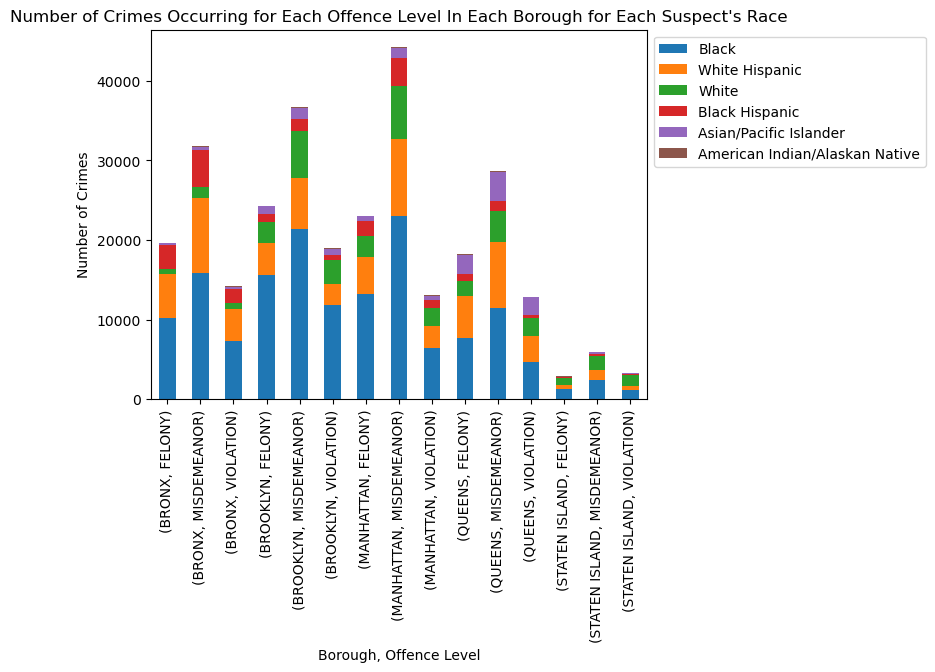

In [118]:
sus_plot = final_sus_df.plot(kind="bar",stacked=True,title="Number of Crimes Occurring for Each Offence Level In Each Borough for Each Suspect's Race",xlabel="Borough, Offence Level",ylabel="Number of Crimes")
sus_plot.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("Suspect Race Graph.png",bbox_inches="tight")